This information fits a retrospective observational cohort comparison. Details

---

**Time Frame**
<br>
Data Collected over 2-Year Span

**Unit of Analysis**
<br>
Individual Child (`object`)

**Group Variable**
<br>
Parent Self-Reported SLD and/or ADHD (`string`, `bool`-like)

**Primary/Dependent Variable**
<br>
WPS, Words Per Sentence (`float`)

**Secondary/Independent Variables**
<br>
- Total Communication Score, PLS5/Bayley 4 (`float`) 
- Age in Months at Time of Testing (`int`) 
- Gender (`string`, `enum`-like) 
- Parent Demographics (`string[]`, where `string` is `enum`-like and/or `bool`-like) 
    - *Can also be used as covariates or descriptive balance*
---

**Research Question**:
<br>
Do DHH Children whose parents self-report a history of SLD and/or ADHD have significantly lower WPS scores compared to DHH children whose parents do not report such a history?

**Null**:
<br>
There is no difference in mean WPS scores between children of parents who self-report SLD/ADHD and those who do not.

**Alternate**:
<br>
There is a difference in WPS scores between the two groups.

**Analysis**:
<br>
Smaller sample, non-normality is likely.

---

**Descriptive**
- Mean, median, SD, min-max WPS by group
- Breakdowns of Age and Gender

**Inferential**
- Nonparametric Test: Mann-Whitney U test for WPS between the two groups
- T-Test if assumptions are met
- Effect Size: r or Cliff's delta to get interpretable magnitude, even with small n

**Covariate**
- ANCOVA with Age, if assumptions hold, or controlled through stratification/regression

**Supplementary**
- Correlation between WPS and PLS5/Bayley total scores
- Visualization via boxplot or scatterplot with group overlay

**Even with two small groups**
- Can vizualize each child's data point, not just group mean
- Can take case series approach; group trends supplemented by individual-level patterns; potentially powerful in developmental speech-language research with a low n (e.g. plotting age (x-axis) vs WPS (y-axis) and marking group by color)

---

**Reporting Structure**
- Participants
- n = Total children (xx parent self-report, xx no self-report)
- Age Range = xx (mean; SD)
- similar gender distribution accross groups

**Measures**
- WPS derived from attempted language sample
- PLS5/Bayley total score
- Parent self-report of SLD/ADHD

**Analysis**
- Nonparametric group comparison of WPS
- Effect size
- Descriptive statistics of age, gender, and language score
- Exploratory scatterplots and individual-level data presentation

**Regression (optional)**
- WPS = b~0 + (b~1 * Parent SLD/ADHD) + (b~2 * Age) + e
- Adjusted effect of parent sld/adhd on child wps
- quantitative estimate of effect size
- label options = "retrospective cohort comparison with small n" or "retrospective case series with group comparison" 


# Variable References

---

**ID** - `integer`
<br>

Values: any `integer`
<br>

**Gender** - `string`, `enum`-like
<br>

Values: `Male`, `Female`
<br>

**Birthdate** - `integer`
<br>

Values: any `integer`
<br>

**Evaluation_Date** - `integer`
<br>

Values: any `integer`
<br>

**Age_Day** - `integer`
<br>

Values: any `integer`
<br>

**Age_Month** - `float`
<br>

Values: any `float`
<br>

**Age_Month_Round** - `integer`
<br>

Values: any `integer`
<br>

**Age_Year** - `float`
<br>

Values: any `float`
<br>

**Age_Year_Round** - `float`
<br>

Values: any `float`
<br>

**Grade_Level** - `string`
<br>

Values: **not standardized**
<br>

**Home_Language** - `string`, `enum`-like
<br>

Values: `ASL`, `*English*`, `Spanish`, `ASL & English`, `ASL & Spanish`, `English & Spanish`, `ASL & English & Spanish` 
<br>

**Exposure_Deaf_Peers** - `string`, `bool`-like
<br>

Values: `Yes`, `No`
<br>

**Household_Status** - `string`, `enum`-like
<br>

Values: `Both Parents`, `Single Parent`, `All Other`
<br>

**Adoption_Status** - `string`, `bool`-like
<br>

Values: `Yes`, `No`
<br>

**Marital_Status** - `string`, `enum`-like
<br>

Values: `Married`, `Unmarried`, `All Other`
<br>

**Maternal_Education** - `string`, `enum`-like
<br>

Values: `College Degree`, `High School or Less`
<br>

**Indicator_SLD_Or_ADHD** - `string`, `bool`-like
<br>

Values: `Yes`, `No`
<br>

**Indicator_Any** - `string`, `bool`-like
<br>

Values: `Yes`, `No`
<br>

**Substance_Use_Any** - `string`, `bool`-like
<br>

Values: `Yes`, `No`
<br>

**Complication_Any** - `string`, `bool`-like
<br>

Values: `Yes`, `No`
<br>

**Birth_Condition** - `string`, `enum`-like
<br>

Values: `Excellent`, `Good`, `Fair`, `Poor`
<br>

**Aided_Side** - `string`, `enum`-like
<br>

Values: `Bilateral`, `Unilateral`, `None`
<br>

**Aided_Type** - `string`, `enum`-like
<br>

Values: `Hearing Aid`, `Cochlear Implant`, `Bone Conduction Device`, `Bimodal`, `None`
<br>

**Device_Usage** - `string`, `enum`-like
<br>

Values: `8+ Hr/Day`, `<8 Hr/Day`
<br>

**Family_History** - `string`, `bool`-like
<br>

Values: `Yes`, `No`
<br>

**Speech_Understanding_To_Family** - `string`, `enum`-like
<br>

Values: `75% or More`, `Less than 75%`
<br>

**Speech_Understanding_To_Others** - `string`, `enum`-like
<br>

Values: `75% or More`, `Less than 75%`
<br>

**Receptive_Similar_To_Peers** - `string`, `bool`-like
<br>

Values: `Yes`, `No`
<br>

**Expressive_Similar_To_Peers** - `string`, `bool`-like
<br>

Values: `Yes`, `No`
<br>

**Testing_Language** - `string`, `enum`-like
<br>

Values: `English`, `ASL & English`
<br>

**SLP** - `string`, `enum`-like
<br>

Values: `AT`, `CS`, `JK`, `AT/JK`
<br>

**WPS_Category** - `string`, `enum`-like
<br>

Values: `Met`, `Not Met`, `Not Given`
<br>

**WPS_Score** - `float`
<br>

Values: any `float`
<br>

**Instrument** - `string`, `enum`-like
<br>

Values: `Bayley`, `CELF5`, `CELP3`, `DAYC2`, `PLS5`, `RESCAE Rec/Exp`, `TACL/TEXL`, `TELD3`, `TOLDI5`, `TOLDP5`, `None Given`
<br>

**Language_Score** - `integer`
<br>

Values: any `integer`


In [12]:
import pandas as pd
import statsmodels.stats.descriptivestats as ds
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import researchpy as rp
from enum import Enum
import warnings

# Supress unwanted errors from script output
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
# Manually define a tab variable because \t isn't working right
# And I don't want to take the time to figure out why, when I can brute force it :)
tab = "        "

# Import data after exclusion from csv
df = pd.read_csv("/workspaces/codespaces-blank/data/final-dataset-aaa26.csv")

In [3]:
# Descriptive Statistics:
# Count, Mean, Median, SD, min-max WPS and Language Scores by group
# Breakdowns of Age and Gender
# ==============================
grouped_stats = ['count', 'mean', 'median', 'std', 'min', 'max']
df_test_filter = df[df['Instrument'].isin({'PLS5', 'Bayley_language'})]

sld_count = df[df['Indicator_SLD_Or_ADHD'] == 'Yes']


In [4]:
age_grouped_df = df.groupby(['Age_Month_Round', 'Indicator_SLD_Or_ADHD'])
age_grouped_df[['WPS_Score', 'Language_Score']].agg(grouped_stats).round(4)

WPS_Score                          \
                                          count     mean median     std   
Age_Month_Round Indicator_SLD_Or_ADHD                                     
33.0            No                            1   2.0100   2.01     NaN   
                Yes                           1   3.6800   3.68     NaN   
34.0            No                           11   1.7773   1.67  0.9731   
                Yes                           0      NaN    NaN     NaN   
35.0            No                           10   1.7210   1.00  1.5373   
                Yes                           2   1.0000   1.00  0.0000   
37.0            No                            1   1.3800   1.38     NaN   
44.0            No                            1   4.6300   4.63     NaN   
46.0            No                            1   5.5800   5.58     NaN   
49.0            No                            1   4.2800   4.28     NaN   
63.0            Yes                           1   5.9400   5.94     NaN   
72.0            No                            0      NaN    NaN     NaN   
78.0            Yes                           0      NaN    NaN     NaN   
79.0            No                            1   6.3600   6.36     NaN   
84.0            No                            1   6.6400   6.64     NaN   
95.0            Yes                           1   5.7800   5.78     NaN   
104.0           Yes                           1  10.2400  10.24     NaN   
108.0           No                            1   9.6800   9.68     NaN   
109.0           No                            1  15.6800  15.68     NaN   
110.0           No                            1   6.4000   6.40     NaN   
116.0           No                            1  13.8800  13.88     NaN   
118.0           No                            1   4.5400   4.54     NaN   
128.0           Yes                           1   6.7200   6.72     NaN   
132.0           No                            1  12.6200  12.62     NaN   
142.0           No                            1  11.7600  11.76     NaN   
150.0           No                            1  15.8800  15.88     NaN   
151.0           Yes                           1   6.2800   6.28     NaN   
153.0           No                            0      NaN    NaN     NaN   
157.0           No                            1  11.3200  11.32     NaN   
184.0           No                            1  11.3600  11.36     NaN   

                                                    Language_Score            \
                                         min    max          count      mean   
Age_Month_Round Indicator_SLD_Or_ADHD                                          
33.0            No                      2.01   2.01              2   77.5000   
                Yes                     3.68   3.68              1  100.0000   
34.0            No                      1.00   3.62             17   82.3529   
                Yes                      NaN    NaN              3   65.6667   
35.0            No                      0.00   4.24             12   84.9167   
                Yes                     1.00   1.00              4   73.2500   
37.0            No                      1.38   1.38              2   73.5000   
44.0            No                      4.63   4.63              1  110.0000   
46.0            No                      5.58   5.58              1   86.0000   
49.0            No                      4.28   4.28              1   76.0000   
63.0            Yes                     5.94   5.94              1   67.0000   
72.0            No                       NaN    NaN              0       NaN   
78.0            Yes                      NaN    NaN              1   79.0000   
79.0            No                      6.36   6.36              1   62.0000   
84.0            No                      6.64   6.64              1  101.0000   
95.0            Yes                     5.78   5.78              1   60.0000   
104.0           Yes                    10.

In [5]:
gender_grouped_df = df.groupby(['Gender', 'Indicator_SLD_Or_ADHD'])
gender_grouped_df[['WPS_Score', 'Language_Score', 'Age_Month_Round']].agg(grouped_stats).round(4)

WPS_Score                                     \
                                 count    mean median     std  min    max   
Gender Indicator_SLD_Or_ADHD                                                
Female No                           17  4.0000   3.62  3.5575  0.0  15.68   
       Yes                           4  4.1850   4.73  2.4036  1.0   6.28   
Male   No                           21  5.3695   2.42  5.3723  0.0  15.88   
       Yes                           4  5.9750   6.33  3.8078  1.0  10.24   

                             Language_Score                                 \
                                      count     mean median      std   min   
Gender Indicator_SLD_Or_ADHD                                                 
Female No                                17  85.2941   86.0  21.8597  54.0   
       Yes                                6  72.1667   71.0  20.7405  45.0   
Male   No                                32  81.8750   86.0  21.4698  50.0   
       Yes                                7  77.1429   79.0  16.9649  50.0   

                                    Age_Month_Round                           \
                                max           count     mean median      std   
Gender Indicator_SLD_Or_ADHD                                                   
Female No                     123.0              18  51.9444   35.0  29.8712   
       Yes                    100.0               7  59.5714   35.0  46.2524   
Male   No                     114.0              34  62.5000   35.0  47.6924   
       Yes                     98.0               8  64.0000   49.0  36.4809   

                                           
                               min    max  
Gender Indicator_SLD_Or_ADHD               
Female No                     33.0  118.0  
       Yes                    33.0  151.0  
Male   No                     33.0  184.0  
       Yes                    34.0  128.0

In [6]:
test_female = df.loc[df['Gender'] == 'Female', 'Language_Score'].dropna().values.tolist()
test_male = df.loc[df['Gender'] == 'Male', 'Language_Score'].dropna().values.tolist()

test_yes_sld = df.loc[df['Indicator_SLD_Or_ADHD'] == 'Yes', 'Language_Score'].dropna().values.tolist()
test_no_sld = df.loc[df['Indicator_SLD_Or_ADHD'] == 'No', 'Language_Score'].dropna().values.tolist()

print(test_male)
print()
print(test_yes_sld)
print()
print(test_female)
print()
print(test_no_sld)

stat, p_value = stats.mannwhitneyu(test_male, test_female)
print('Statistics=%.2f, p=%.2f' % (stat, p_value))
alpha = 0.05
if p_value < alpha:
    print('Reject Null Hypothesis (significant difference between two samples)')
else:
    print('Do not Reject Null Hypotheses (no significant difference between two samples)')

[74.0, 114.0, 92.0, 96.0, 59.0, 63.0, 50.0, 91.0, 50.0, 50.0, 67.0, 86.0, 70.0, 80.0, 109.0, 88.0, 62.0, 94.0, 86.0, 53.0, 65.0, 97.0, 79.0, 98.0, 78.0, 112.0, 70.0, 97.0, 79.0, 110.0, 60.0, 114.0, 58.0, 104.0, 56.0, 68.0, 51.0, 92.0, 107.0, 101.0]

[50.0, 67.0, 87.0, 70.0, 82.0, 60.0, 97.0, 79.0, 98.0, 59.0, 79.0, 45.0, 100.0]

[57.0, 112.0, 123.0, 87.0, 76.0, 62.0, 82.0, 60.0, 47.0, 59.0, 104.0, 73.0, 65.0, 81.0, 95.0, 96.0, 54.0, 110.0, 76.0, 110.0, 60.0, 86.0, 45.0, 91.0, 100.0]

[74.0, 114.0, 92.0, 57.0, 96.0, 59.0, 63.0, 50.0, 91.0, 112.0, 50.0, 123.0, 86.0, 80.0, 109.0, 76.0, 62.0, 88.0, 62.0, 94.0, 86.0, 53.0, 65.0, 78.0, 112.0, 104.0, 73.0, 97.0, 110.0, 65.0, 95.0, 60.0, 114.0, 96.0, 54.0, 58.0, 104.0, 110.0, 76.0, 56.0, 110.0, 60.0, 68.0, 51.0, 92.0, 107.0, 101.0, 86.0, 91.0]
Statistics=509.50, p=0.90
Do not Reject Null Hypotheses (no significant difference between two samples)


Correlation between 'Age' and 'WPS_Score' is: 0.8318505981424661


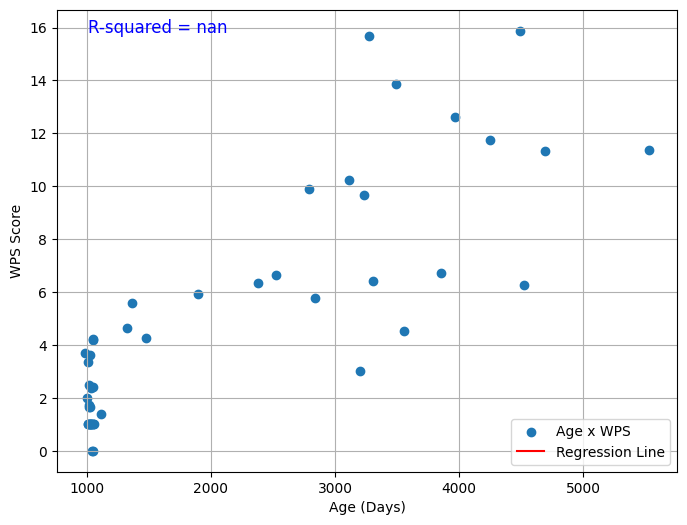

In [ ]:
class Gender(Enum):
    MALE = 1
    FEMALE = 2


class Boolish(Enum):
    YES = 1
    NO = 2

gender_map = {gender.name.lower(): gender.value for gender in Gender}
indicator_map = {response.name.lower(): response.value for response in Boolish}
df['Gender_Enum'] = df['Gender'].map(gender_map)
df['Indicator_SLD_Or_ADHD_Enum'] = df['Indicator_SLD_Or_ADHD'].map(indicator_map)
age_days = df['Age_Day']
wps = df['WPS_Score']

corr_wps_x_age = age_days.corr(wps)
print(f"Correlation between 'Age' and 'WPS_Score' is: {corr_wps_x_age}")

slope, intercept, r_value, p_value, std_err = stats.linregress(age_days, wps)
r_squared = r_value**2

plt.figure(figsize=(8, 6))
plt.scatter(age_days, wps, label='Data Points')
plt.plot(age_days, intercept + slope * age_days, color='red', label='Regression Line')
plt.annotate(f"R-squared = {r_squared:.2f}", xy = (0.05, 0.95), xycoords="axes fraction", fontsize=12, color='blue')
plt.xlabel('Age (Days)')
plt.ylabel('WPS Score')
plt.legend()
plt.grid(True)
plt.show()